<a href="https://colab.research.google.com/github/NitheshKR/heart-attack-prediction-app/blob/main/Copy_of_Heartattack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving heartattackpredictiondataset.csv to heartattackpredictiondataset.csv


In [31]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/heartattackpredictiondataset.csv')

# Display exact column names
print("🔍 Exact column names in the dataset:")
for col in df.columns:
    print(f"- '{col}'")


🔍 Exact column names in the dataset:
- 'Age'
- 'Sex'
- 'Blood Pressure'
- 'Heart Rate'
- 'Diabetes'
- 'Family History'
- 'Smoking'
- 'Obesity'
- 'Alcohol Consumption'
- 'Previous Heart Problems'
- 'Stress Level'
- 'BMI'
- 'Sleep Hours Per Day'
- 'Heart Attack Risk'


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

df = pd.read_csv('/content/heartattackpredictiondataset.csv')

# Convert 'Sex' column to numeric
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})

# Split 'Blood Pressure' into two numeric columns
bp_split = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic_BP'] = bp_split[0].astype(int)
df['Diastolic_BP'] = bp_split[1].astype(int)
df = df.drop('Blood Pressure', axis=1)

# Features and target
X = df.drop('Heart Attack Risk', axis=1)
y = df['Heart Attack Risk']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("✅ Data prepared!")
print("X_train shape:", X_train.shape)
print("X_train_smote shape:", X_train_smote.shape)







✅ Data prepared!
X_train shape: (6134, 14)
X_train_smote shape: (7874, 14)


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)

# Train on the balanced training data
lr.fit(X_train_smote, y_train_smote)

# Predict on test data
y_pred = lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("=== Logistic Regression Evaluation ===")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)


=== Logistic Regression Evaluation ===
Accuracy  : 0.5340
Precision : 0.3549
Recall    : 0.3673
F1 Score  : 0.3610

Confusion Matrix:
[[1058  629]
 [ 596  346]]


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # 'l1' can also be tried if solver supports it
    'solver': ['lbfgs', 'liblinear']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1')
grid.fit(X_train_smote, y_train_smote)

print("Best parameters:", grid.best_params_)

best_lr = grid.best_estimator_
y_pred = best_lr.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.64      0.63      0.63      1687
           1       0.35      0.37      0.36       942

    accuracy                           0.53      2629
   macro avg       0.50      0.50      0.50      2629
weighted avg       0.54      0.53      0.54      2629



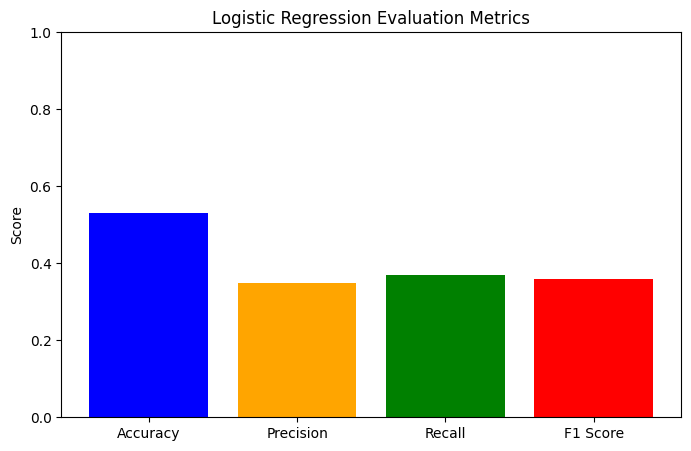

In [35]:
import matplotlib.pyplot as plt

# Metrics values from your tuned Logistic Regression
metrics = {
    'Accuracy': 0.53,
    'Precision': 0.35,
    'Recall': 0.37,
    'F1 Score': 0.36
}

# Create bar plot
plt.figure(figsize=(8,5))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Logistic Regression Evaluation Metrics')
plt.ylabel('Score')
plt.show()


In [36]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train with balanced class weight
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

print("=== Random Forest Evaluation ===")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)


=== Random Forest Evaluation ===
Accuracy  : 0.6322
Precision : 0.3457
Recall    : 0.0297
F1 Score  : 0.0547

Confusion Matrix:
[[1634   53]
 [ 914   28]]


In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Step 1: Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 2: Train Random Forest on SMOTE data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Step 3: Predict and evaluate
y_pred_rf = rf_model.predict(X_test)

# Step 4: Compute metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Step 5: Show results
print("=== Random Forest Evaluation (with SMOTE) ===")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)


=== Random Forest Evaluation (with SMOTE) ===
Accuracy  : 0.5664
Precision : 0.3594
Recall    : 0.2686
F1 Score  : 0.3074

Confusion Matrix:
[[1236  451]
 [ 689  253]]


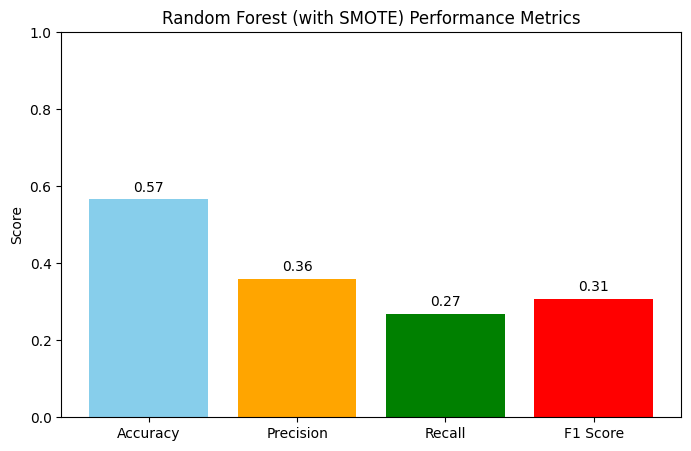

In [38]:
import matplotlib.pyplot as plt

# Metrics for SMOTE-applied Random Forest
rf_smote_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
rf_smote_values = [accuracy, precision, recall, f1]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(rf_smote_metrics, rf_smote_values, color=['skyblue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Random Forest (with SMOTE) Performance Metrics')
plt.ylabel('Score')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.2f}", ha='center')

plt.show()


In [39]:
import pandas as pd

df = pd.read_csv('heartattackpredictiondataset.csv')

print("Unique values in 'Heart Attack Risk' column:")
print(df['Heart Attack Risk'].unique())



Unique values in 'Heart Attack Risk' column:
[0 1]


Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 0.6524
Precision: 0.6783
Recall: 0.5850
F1 Score: 0.6282
Confusion Matrix:
 [[1211  470]
 [ 703  991]]


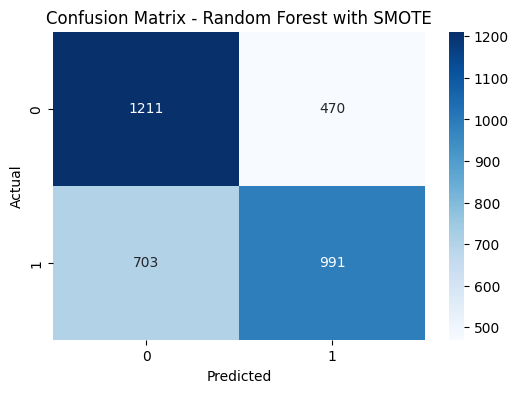

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your original X and y are ready and preprocessed
# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Split into train-test sets after SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

# Define model and hyperparameters grid
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Predict and evaluate
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", cm)

# Plot confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest with SMOTE')
plt.show()


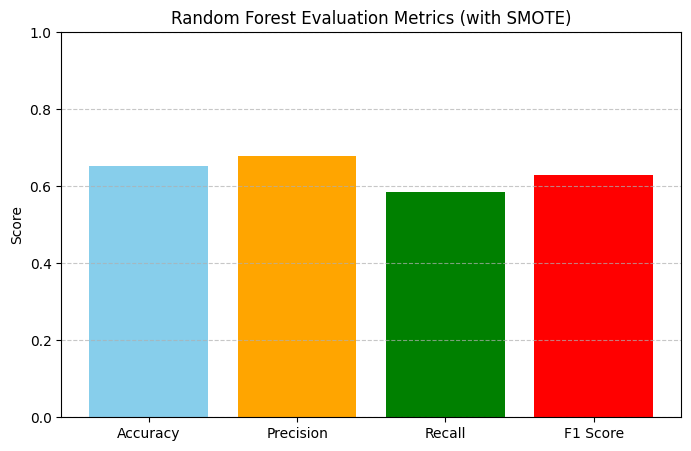

In [41]:
import matplotlib.pyplot as plt

# Random Forest evaluation metrics
accuracy = 0.6524
precision = 0.6783
recall = 0.5850
f1_score =  0.6282

# Create a dictionary of metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1_score
}

# Plotting the bar graph
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title("Random Forest Evaluation Metrics (with SMOTE)")
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [42]:
# Step 1: Import libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Step 2: Load dataset
df = pd.read_csv("/content/heartattackpredictiondataset.csv")

# Step 3: Preprocess data
# Replace 'Male'/'Female' with 0/1
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})

# Convert 'Blood Pressure' from 'sys/dia' to average number
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)
df['Blood Pressure'] = (df['Systolic'] + df['Diastolic']) / 2
df.drop(columns=['Systolic', 'Diastolic'], inplace=True)

# Drop missing values (can be customized)
df.dropna(inplace=True)

# Separate features and target
X = df.drop('Heart Attack Risk', axis=1)
y = df['Heart Attack Risk']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 6: Train SVM model
svm = SVC(C=1, kernel='rbf', gamma='scale', probability=True, random_state=42)
svm.fit(X_train_smote, y_train_smote)

# Step 7: Predict and Evaluate
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
cm = confusion_matrix(y_test, y_pred)

# Step 8: Print results
print("=== SVM Evaluation (with SMOTE) ===")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)


=== SVM Evaluation (with SMOTE) ===
Accuracy  : 0.4937
Precision : 0.3573
Recall    : 0.5245
F1 Score  : 0.4251

Confusion Matrix:
[[806 885]
 [446 492]]


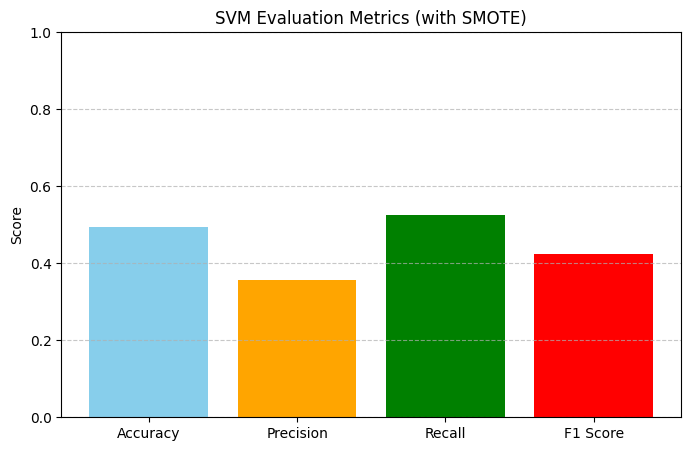

In [43]:
import matplotlib.pyplot as plt

# SVM evaluation metrics
accuracy = 0.4937
precision = 0.3573
recall = 0.5245
f1_score = 0.4251

# Create a dictionary of metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1_score
}

# Plotting the bar graph
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title("SVM Evaluation Metrics (with SMOTE)")
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


=== KNN Evaluation (with SMOTE) ===
Accuracy  : 0.4933
Precision : 0.3473
Recall    : 0.4776
F1 Score  : 0.4022

Confusion Matrix:
[[849 842]
 [490 448]]


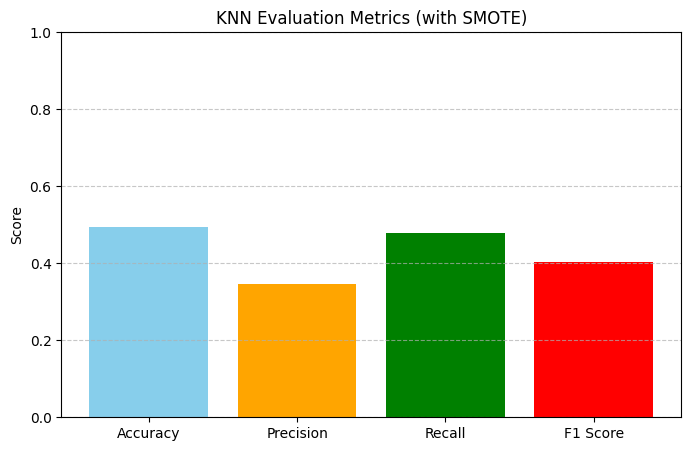

In [44]:
# Imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors if needed
knn_model.fit(X_train_smote, y_train_smote)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
cm = confusion_matrix(y_test, y_pred_knn)

# Print results
print("=== KNN Evaluation (with SMOTE) ===")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)

# Bar graph
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title("KNN Evaluation Metrics (with SMOTE)")
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [19]:
# Ensure required libraries are imported
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named df and the target column is 'Heart Attack Risk'
X = df.drop('Heart Attack Risk', axis=1)
y = df['Heart Attack Risk']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


=== Hybrid Voting Classifier Evaluation ===
Accuracy  : 0.5230
Precision : 0.3448
Recall    : 0.3742
F1 Score  : 0.3589

Confusion Matrix:
[[1024  667]
 [ 587  351]]


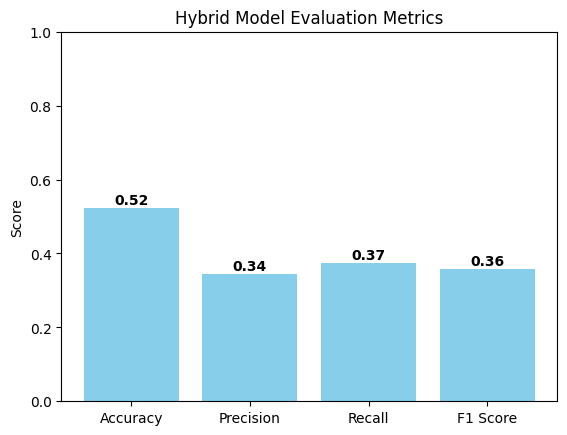

In [45]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define each model with best parameters
log_reg = LogisticRegression(C=0.1, penalty='l2', solver='lbfgs', max_iter=1000)
rf = RandomForestClassifier(n_estimators=300, min_samples_split=5, max_depth=None, random_state=42)
svm = SVC(kernel='rbf', probability=True)  # SVM with probability=True for soft voting
knn = KNeighborsClassifier(n_neighbors=5)

# Create Voting Classifier (soft voting)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_reg),
        ('rf', rf),
        ('svm', svm),
        ('knn', knn)
    ],
    voting='soft'
)

# Train the hybrid model
voting_clf.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred = voting_clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print results
print("=== Hybrid Voting Classifier Evaluation ===")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)

# Optional: Bar graph
import matplotlib.pyplot as plt

metrics = [accuracy, precision, recall, f1]
names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.bar(names, metrics, color='skyblue')
plt.ylim(0, 1)
plt.title('Hybrid Model Evaluation Metrics')
plt.ylabel('Score')
for i, v in enumerate(metrics):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()


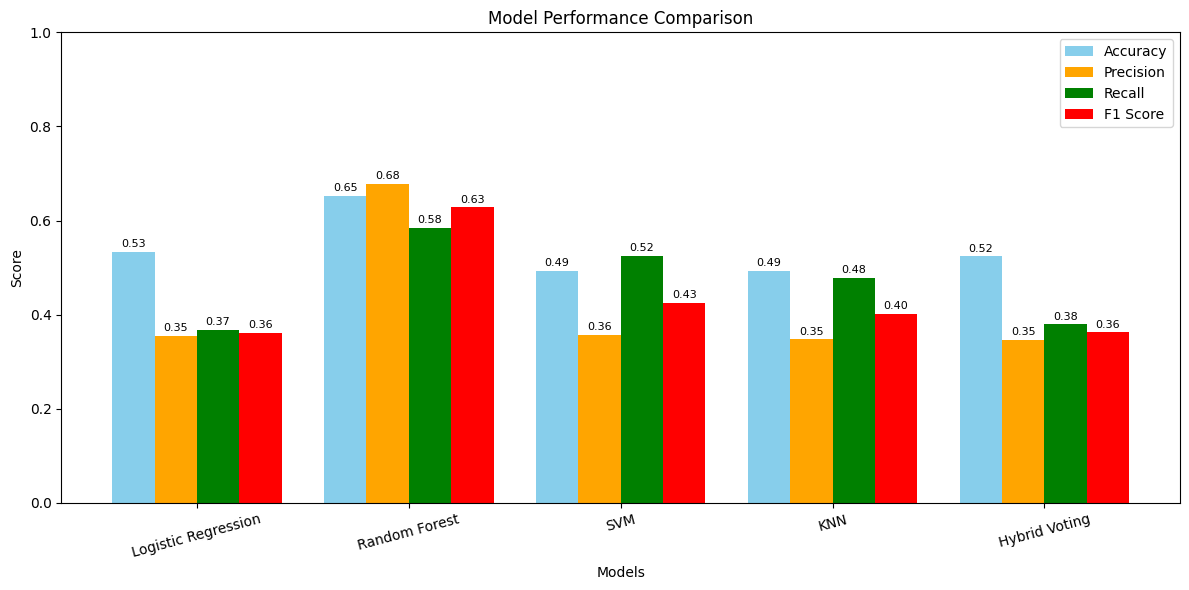

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'KNN', 'Hybrid Voting']

# Replace the below values with your final evaluated scores
accuracies  = [0.5340, 0.6524, 0.4937, 0.4933, 0.5238]
precisions  = [0.3549, 0.6783, 0.3573, 0.3473, 0.3470]
recalls     = [0.3673, 0.5850, 0.5245, 0.4776, 0.3795]
f1_scores   = [0.3610, 0.6282, 0.4251, 0.4022, 0.3625]

# Grouped bar chart settings
x = np.arange(len(model_names))
bar_width = 0.2

plt.figure(figsize=(12, 6))

# Plot bars
plt.bar(x - 1.5 * bar_width, accuracies, width=bar_width, label='Accuracy', color='skyblue')
plt.bar(x - 0.5 * bar_width, precisions, width=bar_width, label='Precision', color='orange')
plt.bar(x + 0.5 * bar_width, recalls, width=bar_width, label='Recall', color='green')
plt.bar(x + 1.5 * bar_width, f1_scores, width=bar_width, label='F1 Score', color='red')

# Chart settings
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, model_names, rotation=15)
plt.ylim(0, 1)
plt.legend()

# Add labels to bars
for i in range(len(model_names)):
    plt.text(x[i] - 1.5 * bar_width, accuracies[i] + 0.01, f"{accuracies[i]:.2f}", ha='center', fontsize=8)
    plt.text(x[i] - 0.5 * bar_width, precisions[i] + 0.01, f"{precisions[i]:.2f}", ha='center', fontsize=8)
    plt.text(x[i] + 0.5 * bar_width, recalls[i] + 0.01, f"{recalls[i]:.2f}", ha='center', fontsize=8)
    plt.text(x[i] + 1.5 * bar_width, f1_scores[i] + 0.01, f"{f1_scores[i]:.2f}", ha='center', fontsize=8)

plt.tight_layout()
plt.show()


In [53]:
#train and save model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import joblib

# =======================
# 1. Load dataset
# =======================
df = pd.read_csv("heartattackpredictiondataset.csv")

# =======================
# 2. Preprocess data
# =======================
# Convert 'Sex' column to numeric
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})

# Split 'Blood Pressure' into two numeric columns
bp_split = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic_BP'] = bp_split[0].astype(int)
df['Diastolic_BP'] = bp_split[1].astype(int)
df = df.drop('Blood Pressure', axis=1)

# Convert other relevant categorical columns to numeric if necessary
# Based on previous cells, these columns might be treated as categorical
# and need mapping to numerical values if not already done and if they are in X
categorical_cols_to_map = ['Diabetes', 'Family History', 'Smoking', 'Obesity',
                           'Alcohol Consumption', 'Previous Heart Problems']

for col in categorical_cols_to_map:
    if col in df.columns:
        # Check unique values to decide on mapping or one-hot encoding
        # Assuming binary for now based on common dataset patterns
        if df[col].dtype == 'object': # Only map if it's an object type (string)
             # Check if values are consistently Yes/No
            if set(df[col].dropna().unique()).issubset({'Yes', 'No'}):
                 df[col] = df[col].map({'Yes': 1, 'No': 0})
            # Add other handling for different categorical types if needed
            # For example, one-hot encoding for columns with more than 2 unique values

# Handle missing values after preprocessing
df.dropna(inplace=True)


# =======================
# 3. Features and target
# =======================
X = df.drop("Heart Attack Risk", axis=1)
y = df["Heart Attack Risk"]

# =======================
# 4. Split into train/test
# =======================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =======================
# 5. Scale features (for LR, SVM, KNN)
# =======================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler
joblib.dump(scaler, "scaler.pkl", compress=3)

# =======================
# 6. Train Models
# =======================

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
joblib.dump(log_reg, "logistic_regression.pkl", compress=3)

# Support Vector Machine
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)
joblib.dump(svm_model, "svm.pkl", compress=3)

# Random Forest (no scaling needed)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
joblib.dump(rf_model, "random_forest.pkl", compress=3)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
joblib.dump(knn_model, "knn.pkl", compress=3)

print("✅ All models and scaler trained and saved successfully!")

✅ All models and scaler trained and saved successfully!
